In [40]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from cnmf_e import update_ring_model_w

In [6]:
data = np.load("init_W.npz")
print(data.files)
d1, d2, T, r = data['arr_4']
# print(d1, d2, r, T)
U = data['arr_0']
V = data['arr_1']
A = data['arr_2']
X = data['arr_3']

['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4']


In [38]:
d1, d2

(252, 304)

In [7]:
print(U.shape, V.shape, A.shape, X.shape)
b0, W = update_ring_model_w(U, V, A, X, [], d1, d2, T, r)
print(b0.shape, W.shape)
# np.savez('b_w.npz', b0=b0, W=W)

(76608, 50) (50, 2000) (76608, 200) (200, 50)
(76608,) (76608, 76608)


In [1]:
# data_bw = np.load("b_w.npz", allow_pickle=True)
# print(data_bw.files)
# b0 = data_bw['b0']
# W = data_bw['W']

In [8]:
t0 = U - np.matmul(A, X)
t1 = np.matmul(t0, V)

In [18]:
t2 = W.dot(t1)

In [19]:
t2.shape

(76608, 2000)

In [29]:
t3 = b0 - W.dot(b0) 

In [30]:
t3.shape

(76608,)

In [32]:
t4 = np.expand_dims(t3, axis=1)
t4.shape

(76608, 1)

In [34]:
t5 = np.tile(t4, 2000)
t5.shape

(76608, 2000)

In [35]:
b_s = t2 + t5

In [36]:
mov = np.matmul(U,V) - b_s

In [37]:
mov.shape

(76608, 2000)

In [39]:
video = mov.reshape(252, 304, 2000)

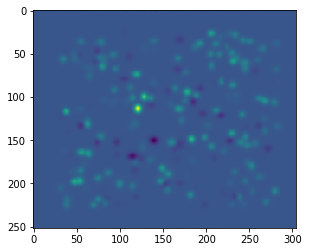

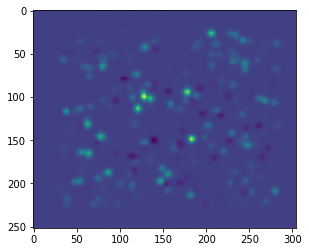

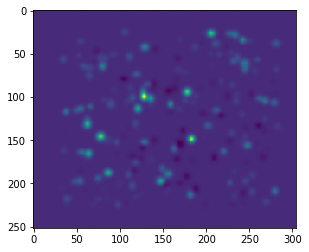

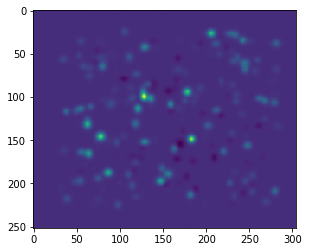

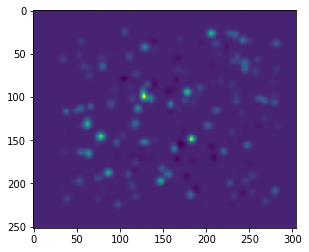

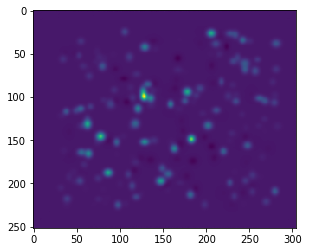

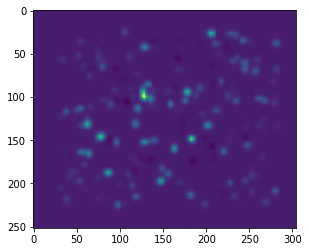

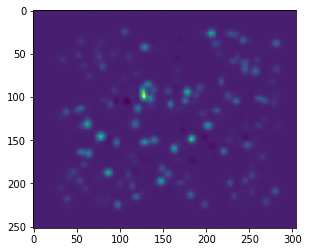

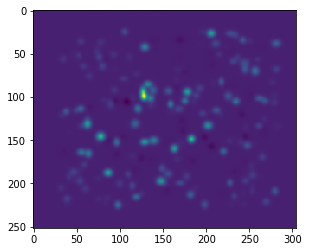

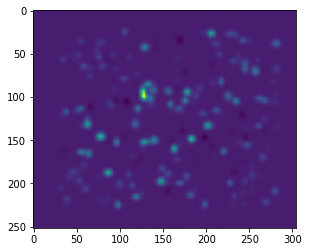

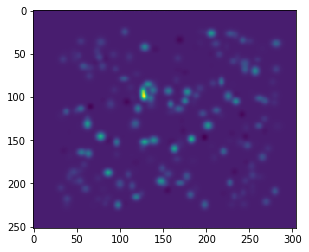

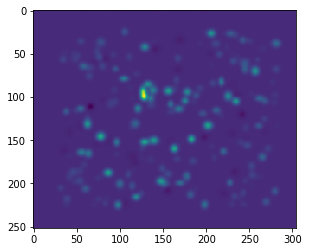

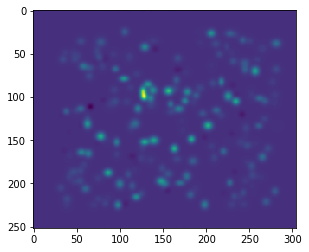

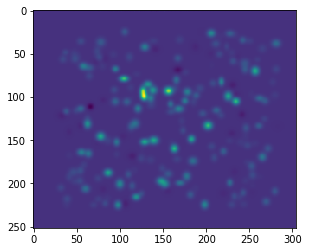

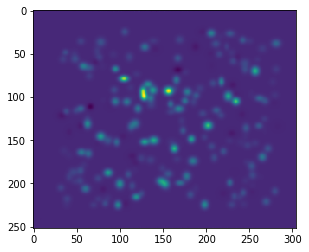

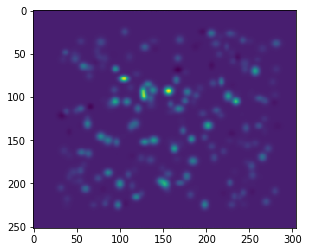

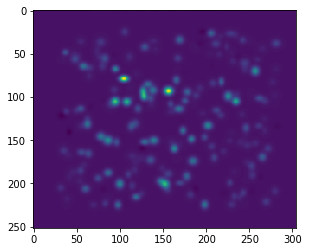

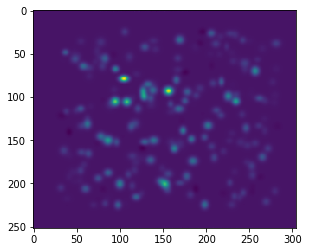

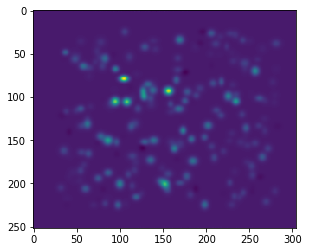

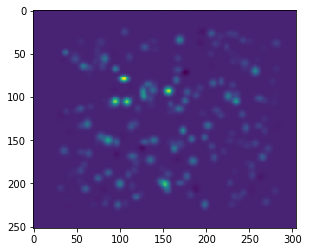

In [45]:
# matrix= np.genfromtxt(path,delimiter=',') # Read the numpy matrix with images in the rows
# c=matrix[0]
# c=c.reshape(252, 304) # this is the size of my pictures

for i in range(20):
    row = video[:, :, i]
#     row=row.reshape(252, 304) # this is the size of my pictures
    im=plt.imshow(row)
    im.set_data(row)
    plt.pause(0.02)
plt.show()